# Customer Churn

Dataset used: telco-dataset

Import

In [73]:
# Data handling
import pandas as pd
import numpy as np

In [74]:
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# Other packages
import os, pickle
import warnings
warnings.filterwarnings("ignore")

Data Loading

In [75]:
# For CSV, use pandas.read_csv
df = pd.read_csv("Customer-Churn.csv")

EDA

In [76]:
#check the number of columns  and rows
df.shape

(7043, 21)

In [77]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [78]:
#Check missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
# Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
# Check duplicates
df.duplicated().sum()

0

In [81]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in churn column because of our ML model
df.loc[df.Churn == 'Yes','Churn'] = 1
df.loc[df.Churn == 'No','Churn'] = 0

In [82]:
# convert string values 'Female' and 'Male' to numeric values '1' and '0' in gender column
df.loc[df.gender == 'Female','gender'] = 1
df.loc[df.gender == 'Male','gender'] = 0

In [83]:
# convert 'No internet service' to 'No' for columns 'OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTv'
cols = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols :
    df[i] = df[i].replace({'No internet service': 'No'})

In [84]:
#Replace 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service','No phone service'], 'No', inplace=True)

’TotalCharges’ is categorical but has some float values

Change the datatype to float for datatype consistency

In [85]:
#Replaces the spaces with null values
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [86]:
#Drop the null value feature which contain .50% missing values
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [87]:
#Convert 'TotalCharges' column to float datatype
df['TotalCharges'] = df["TotalCharges"].astype(float)

In [88]:
# value count on 'Churn'  #Distribution of target column
df["Churn"].value_counts().values

array([5163, 1869], dtype=int64)

Data Visualization

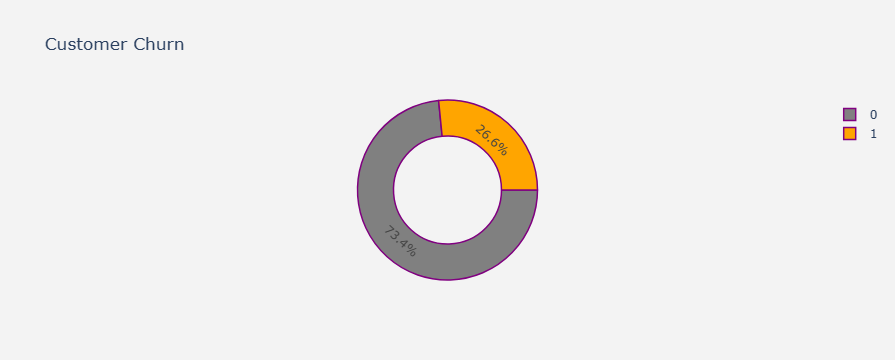

In [89]:
#visualizing the total customer churn
churn_labels = df["Churn"].value_counts().keys().tolist()
churn_values = df["Churn"].value_counts().values.tolist()
plot_data = [go.Pie(labels=churn_labels,
                    values=churn_values,
                    marker=dict(colors=['grey','orange'], line=dict(color="purple",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= .6)          
            ]                    
plot_layout = go.Layout(dict(title="Customer Churn",
                             plot_bgcolor='rgb(243,243,243)',
                             paper_bgcolor='rgb(243,243,243)')) 
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

<Axes: xlabel='Churn', ylabel='count'>

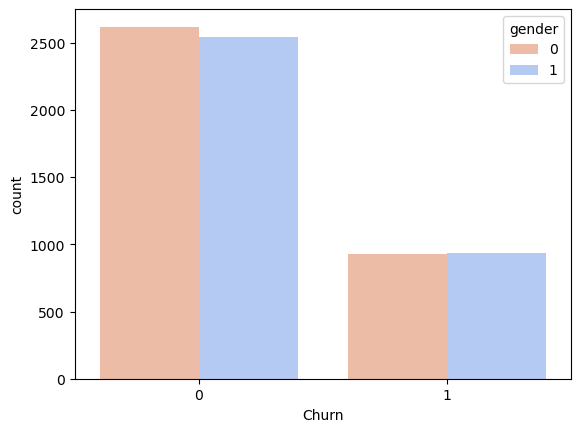

In [90]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

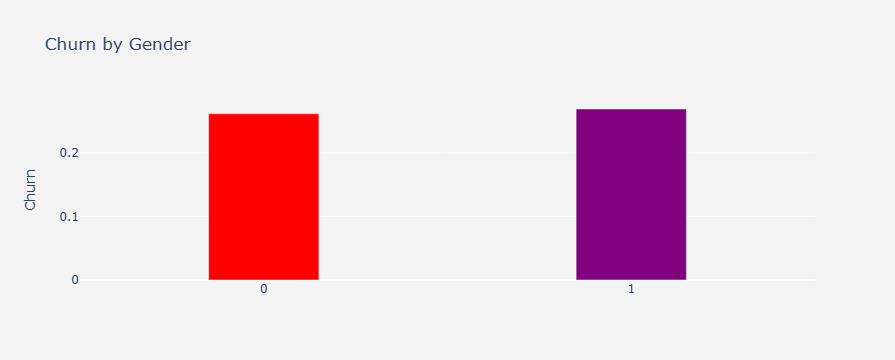

In [91]:
#visualize churn by gender
plot_by_gender = df.groupby('gender').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_gender['gender'],
    y=plot_by_gender['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Gender',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

Insights:

From the above graph, churn for both male and female is almost similar but female’s was slightly higher.

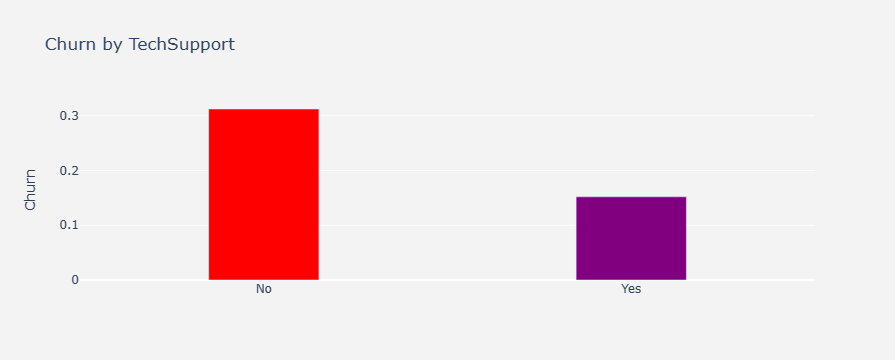

In [92]:
#visualize churn by TechSupport
plot_by_TechSupport = df.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_TechSupport['TechSupport'],
    y=plot_by_TechSupport['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by TechSupport',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

From the above, it is observed that the customers that did not have TechSuport had the highest attrition. It’s therefore necessary to initiate measure of encouraging more customers to use TechSupport services in order to reduce the customers’ turnover probability.

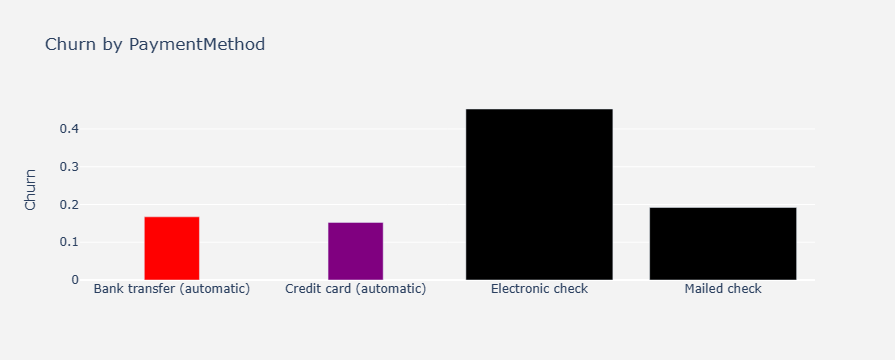

In [93]:
#visualize churn by PaymentMethod
plot_by_PaymentMethod = df.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_PaymentMethod['PaymentMethod'],
    y=plot_by_PaymentMethod['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by PaymentMethod',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

Insights:

-Based on the findings above, we can observe that payment method does have an impact on customer churn. However, we can conclude that customers using electronic check as their payment method have a significantly higher churn rate compared to other payment methods.

-This insight can help inform strategies to reduce churn, such as promoting alternative payment methods or providing incentives for customers to switch from electronic check to more stable payment methods.


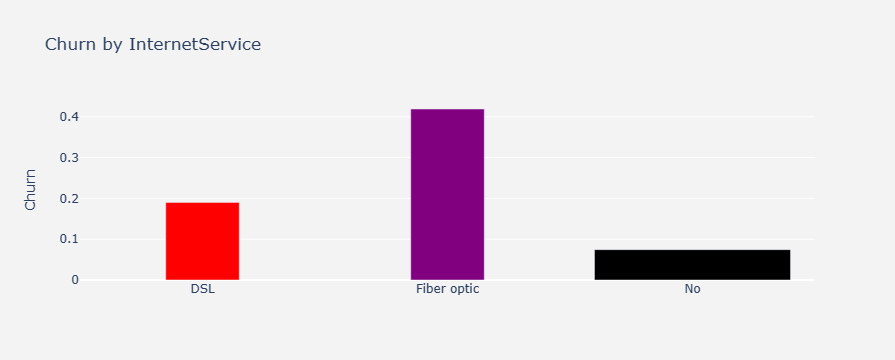

In [94]:
#visualize churn by InternetService
plot_by_InternetService = df.groupby('InternetService').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_InternetService['InternetService'],
    y=plot_by_InternetService['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by InternetService',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

Insights: 

-Customers with fiber optic as InternetService are most likely to churn

-One of the reasons could be price

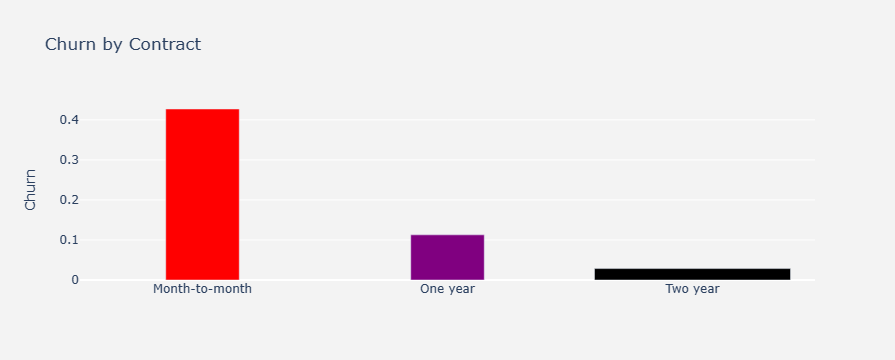

In [95]:
#visualize churn by Contract
plot_by_Contract = df.groupby('Contract').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_Contract['Contract'],
    y=plot_by_Contract['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Contract',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

From the graph Churn by Contract, we can see that more customers that churn have the Month-to-Month subscription. We can therefore conclude that there is a negative correlation between the contact length and customer churn; i.e the shorter the contract length, the more likely the customer will churn.

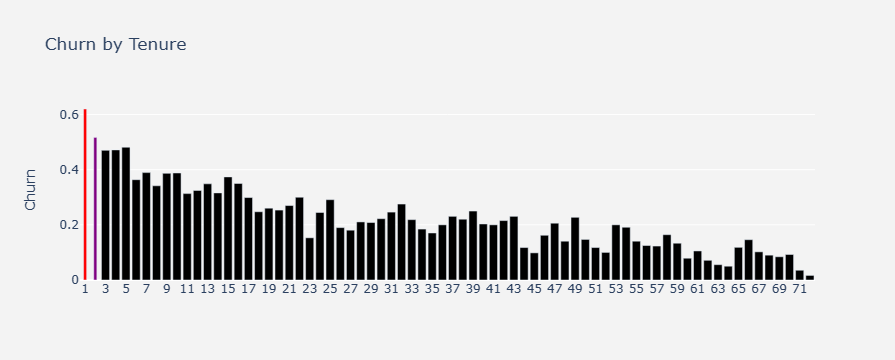

In [96]:
#visualize churn by Tenure
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_tenure['tenure'],
    y=plot_by_tenure['Churn'],
    
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Tenure',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout) 
po.iplot(fig)

The higher the tenure the lower the churn

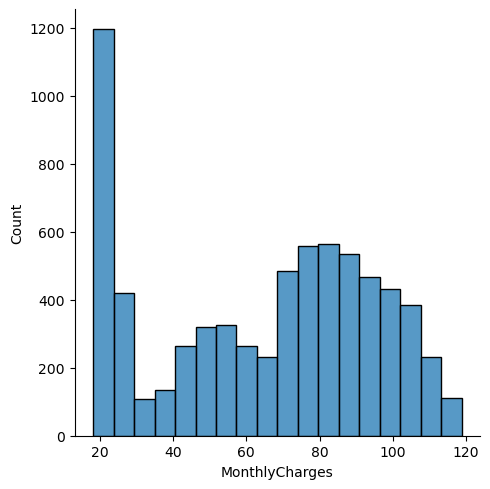

In [97]:
# visualize the distribution of 'MonthlyCharges'
sns.displot(df, x=df.MonthlyCharges)

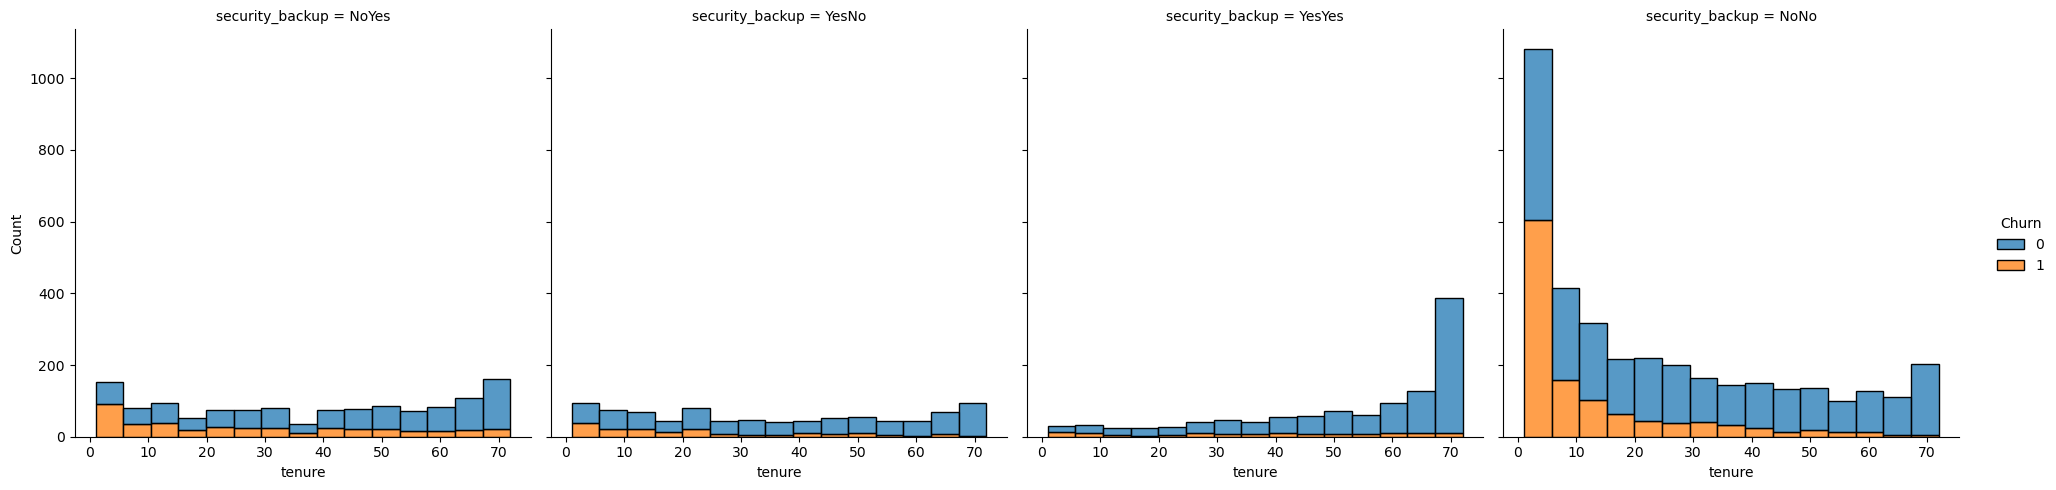

In [98]:
df['security_backup'] = df.OnlineSecurity + df.OnlineBackup

df['security_backup'] = df.security_backup.replace({2:1})

sns.displot(df,x='tenure',col='security_backup',hue='Churn',multiple='stack')

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

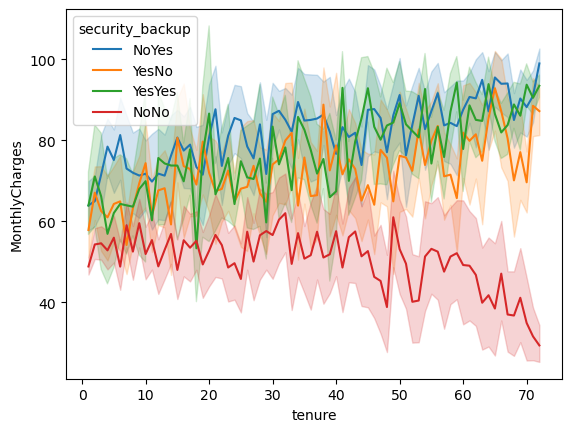

In [99]:
sns.lineplot(x="tenure", y="MonthlyCharges", hue="security_backup", data=df)

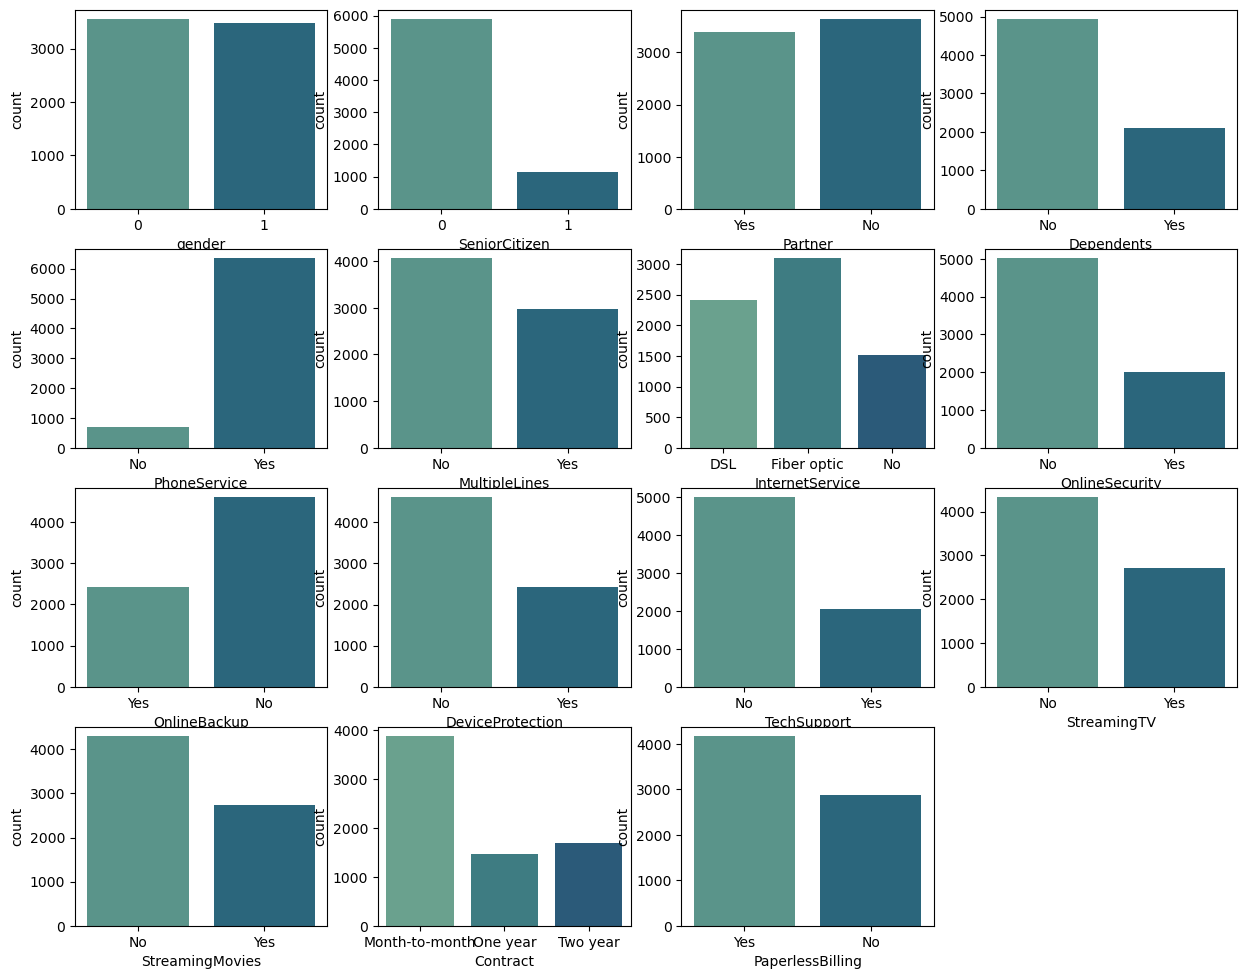

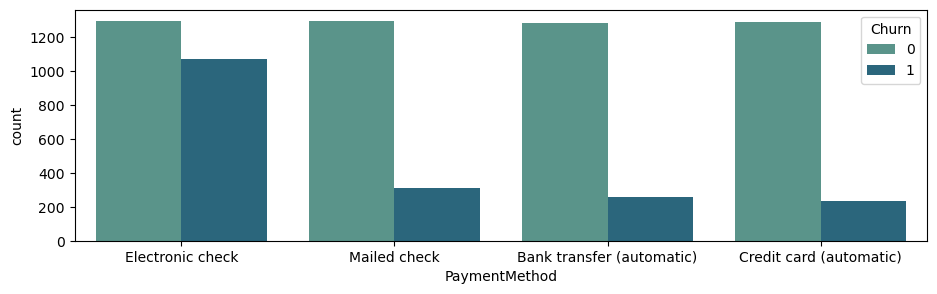

<Figure size 640x480 with 0 Axes>

In [100]:
# Visualizing Categorical features 
#countplot 

cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']
plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

-From the dependents graph above, we can coclude that customers with dependants are less likey to churn compared to those without dependents

-From the DeviceProtection graph above, it is noted that many customers who churned did not have device protection.
Therefore, the team must formulate incentive strategies to encourage customers to use the device protection service.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

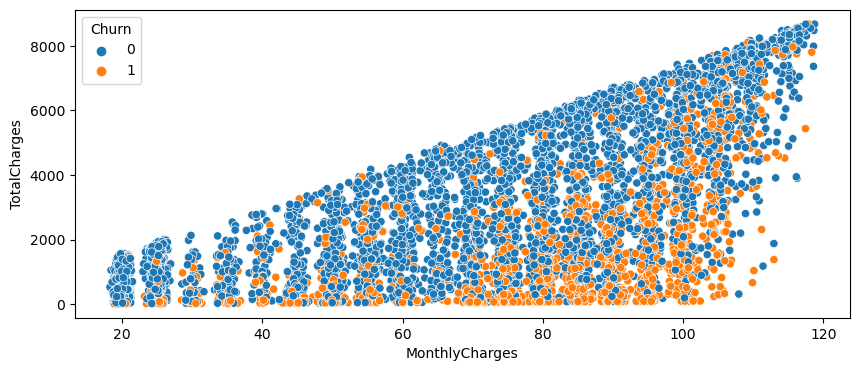

In [101]:
# Plot ‘MonthlyCharges’ vs ‘TotalCharges’
# Scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn")


Monthly charges and churn

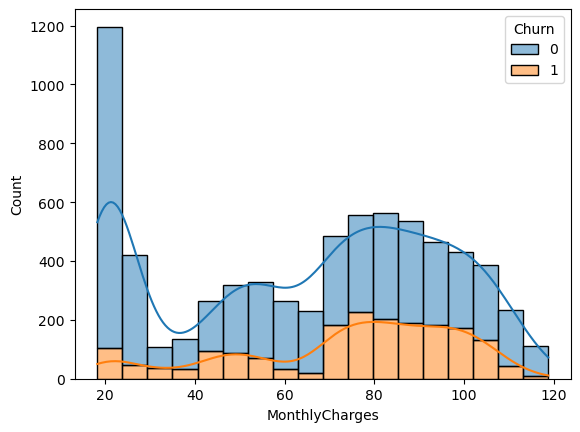

In [102]:
# Using a Histogram, visualize monthly charges and churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()

Correlation between numerical features and target variable

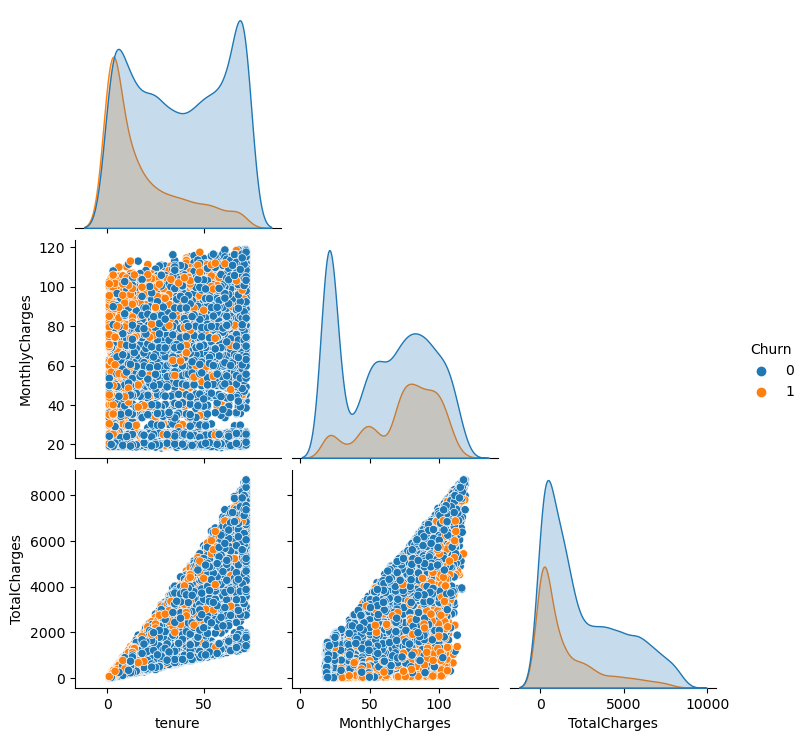

In [103]:
# Check the correlation between numerical features and target variable
# Numerical feature = 'tenure', 'MonthlyCharges', 'TotalCharges'
# Target variable = 'Churn'
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[numerical_cols + ['Churn']]
sns.pairplot(df_num, hue='Churn', corner=True)
plt.show()

From the graphs above, we see that most people with low tenure and high monthly charge are most likely to churn

Correlation matrix of all features

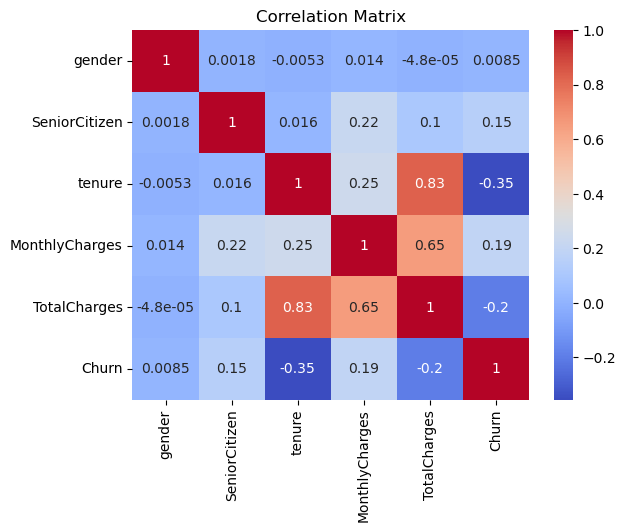

In [104]:
# Check the correlation matrix of all features
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Conclusion:

-Take into account the following aspects:

-Customers with fiber optic as Internet Service

-Payment method

-Gender

-heat matrix